#### Notebook config

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from arrau.a2d import Arr2d
from fwipy import *
from fwipy.plot.misc import plot_square
from fwipy.seismic.misc import Box3d
from fwipy.seismic.proteus import PROTEUS
from plotea.mpl2d import figure

In [86]:
xp = PROTEUS()
xp.read_all()
b01 = Box3d(+8.0e3, +2.5e4 , -3.0e3, +1.5e4, 0, +4.0e3)
b02 = Box3d(+0.8e4, +1.8e4 , +0.4e4, +1.4e4, 0, +4.0e3)
bt = Arr2d(xp.bt.extract(extent=b01.xy).arr, extent=np.array(b01.xy)/1000)

In [ ]:
file_name = 'data_kolumbo_PhD_all_traces_field_filtered.sgy'
data_path = '../data/'
sgy = SgyFile(file_name, data_path)
sgyobs = sgy
h = sgy.read_header()

In [ ]:
plt.style.reload_library()
plt.style.use(['default', 'paper2022kolumbo']) # this sets Arial font

In [89]:
def get_sr_coords(h, tracf, ep):
    df = h.loc[h.ep==ep]
    srcs_x = df.sx /1000
    srcs_y = df.sy /1000
    df = h.loc[h.tracf==tracf]
    recs_x = df.gx.unique() / 1000
    recs_y = df.gy.unique() / 1000
    return srcs_x, srcs_y, recs_x, recs_y

In [77]:
srcs_x, srcs_y, recs_x, recs_y = get_sr_coords(h, tracf, ep)
recs_y

array([6925])

In [102]:
b01.xy[1]

[-3000.0, 15000.0]

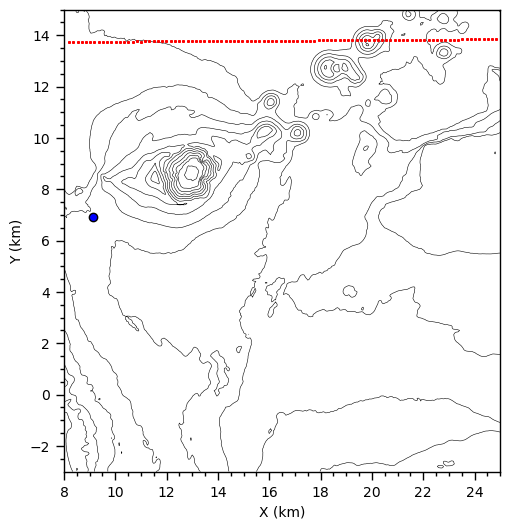

In [100]:
def plot_profile_geom(header, sid, lid):
    srcs_x, srcs_y, recs_x, recs_y = get_sr_coords(header, sid, lid)
    recs_ids = [sid]
#     print(recs_x, recs_y)
#     return
    figure(6,6)
#     bt.plot(mode='shade', cmap='cmo.deep', # below are cbar settings:
#             label='Seafloor depth (m b.s.l.)', 
#             orientation='horizontal', position='bottom', pad=.6)
    bt.plot(mode='cr', colors='k', show_cntr_labels=True, fontsize=6)
    shotsize, shotcolor = 2, 'r'
    plt.plot(srcs_x, srcs_y, linestyle='', marker='.', label='shot',
             markersize=1, markerfacecolor=shotcolor, markeredgecolor=shotcolor)
    plt.plot(recs_x, recs_y, marker='o', linestyle='', markersize=shotsize*3, 
                   markeredgecolor='k', markeredgewidth=1, markerfacecolor='b')
    shift = 0.5
#     for ID, x, y in zip(recs_ids, recs_x, recs_y):
#         xytext = (x-shift, y+shift)
#         plt.annotate(text=str(ID), xy=(x,y), xytext=xytext, clip_on=True, fontsize=8,
#                     bbox={'facecolor': 'w', 'edgecolor': 'w', 'alpha': .5, })
#     plot_square(8.01,18,4,14)
    plt.xlabel('X (km)')
    plt.ylabel('Y (km)')
    # plt.xticks(range(10,24,5))
    # plt.yticks(range(0,12,5))
    plt.xlim(np.array(b01.xy[0])/1000)
    plt.ylim(np.array(b01.xy[1])/1000)
    plt.gca().set_aspect('equal')
    # plt.savefig('../manuscript/figures/fig01b.png', dpi=300)
    plt.show()
plot_profile_geom(h, 4125, 5)

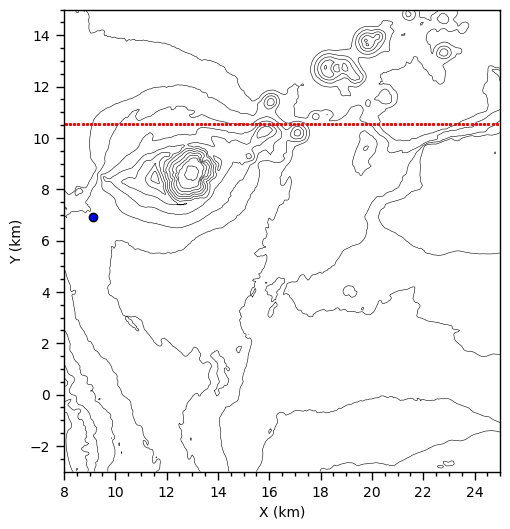

In [101]:
plot_profile_geom(h, 4125, 37)

# ...